In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def pos(x,y):
    return np.array([x,y])

In [3]:
#t += dt
#x += v∗dt + 0.5∗a_i∗dt∗∗2
#a_iplus1 = 
#v += 0.5∗(a_i + a_iplus1 )∗dt
#a_i = a_iplus1



In [4]:
def leap_dkd(G,Ms,Me,r,v,tm,dt):
    vl = []
    rx = []
    ry=[]
    time = []
    energy = []
    rx.append(r[0])
    ry.append(r[1])
    f1 = G*Ms*(r)/np.power(np.linalg.norm(r),3.0)
   
    for i in np.arange(0,tm,dt):

        
     
        r[0] +=   dt*(v[0]) + (1/2)*(f1[0])*(dt**2)
        r[1] +=  (v[1])*dt + 0.5*(f1[1])*dt**2
        
    
        f = G*Ms*(r)/np.power(np.linalg.norm(r),3.0)
       
        r = pos(r[0],r[1])
        
        v[0] -= 0.5*(f1[0] + f[0])*dt
        v[1] -= 0.5*(f1[1] + f[1])*dt
        
        f1[0] = f[0]
        f1[1] = f[1]

        eng = (Me*np.dot(v,v)/2) - G*Me*Ms/(np.linalg.norm(r))
        rx.append(r[0])
        ry.append(r[1])
        time.append(i)
        energy.append(eng)

    rx = np.array(rx)/1.496e11
    ry = np.array(ry)/1.496e11

    plt.figure(figsize=(10,8),dpi=100)
    plt.plot(rx,ry)
    plt.xlabel('x (AU)',fontsize=18)
    plt.ylabel('y (AU)',fontsize=18)
    plt.title("Orbital motion of Earth around Sun",fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.show()
    plt.savefig('orbit.png')


    time = np.array(time)/3.154e7
    energy = np.array(energy)/10e33

    plt.figure(figsize=(10,8),dpi=100)
    plt.plot(time,energy)
    plt.xlabel('Time (year)',fontsize=18)
    plt.ylabel('Energy (10e33 X J)',fontsize=18)
    plt.title("Total energy vs Time",fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.show()
    plt.savefig('energy-time.png')



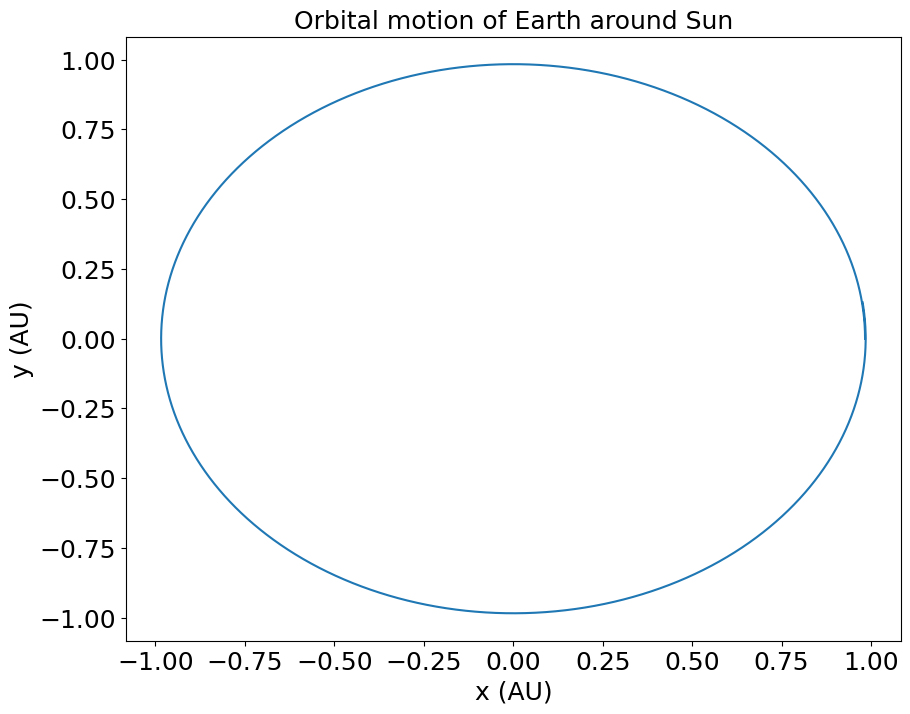

<Figure size 432x288 with 0 Axes>

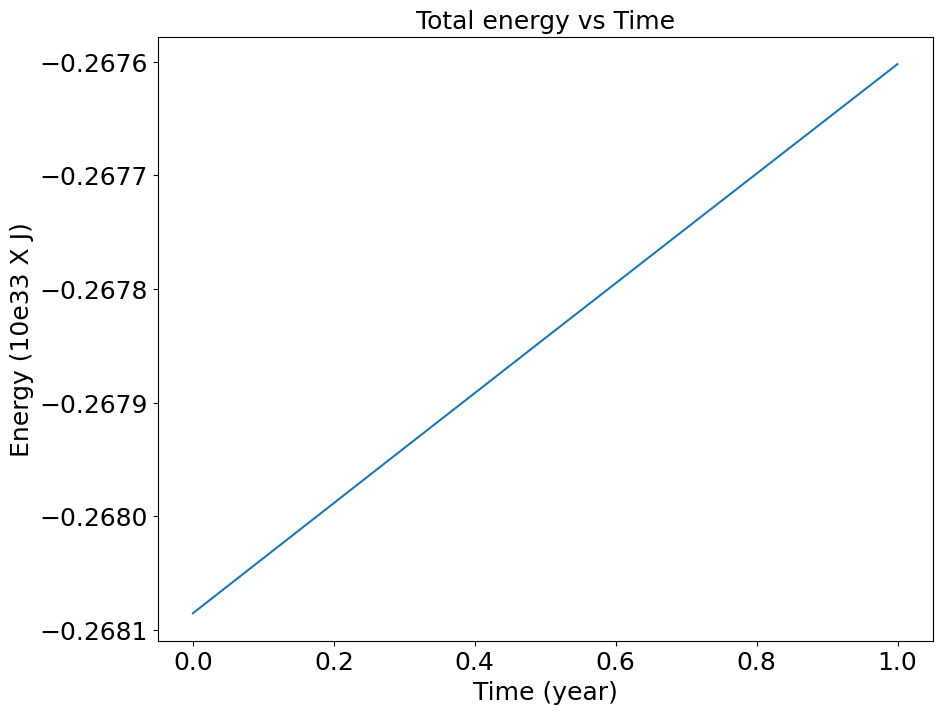

<Figure size 432x288 with 0 Axes>

In [5]:
G = 6.67e-11
#G = 39.441 #solar

#mass of the sun
Ms = 1.98e30

#Ms = 1 #solar

#earth mass
Me = 5.972e24


#initial position 
x0 = 147098291000
y0 = 0



r = np.array([x0,y0])

#initial velocity
vx0 = 0
vy0 = np.sqrt(G*Ms/np.power(np.linalg.norm(r),1.0) ) 


v = np.array([vx0,vy0])

#velocity
dt = 0.008*24*60*60
tm = 365*24*60*60


leap_dkd(G,Ms,Me,r,v,tm,dt)

In [6]:
def leap_kdk(G,Ms,Me,r,v,tm,dt):
    vl = []
    rx = []
    ry=[]
    time = []
    energy = []
    rx.append(r[0])
    ry.append(r[1])
    f1 = G*Ms*(r)/np.power(np.linalg.norm(r),3.0)
   
    for i in np.arange(0,tm,dt):

        
        
        v[0] -= (f1[0])*dt
        v[1] -= (f1[1])*dt
        
        f = G*Ms*(r)/np.power(np.linalg.norm(r),3.0)
        
        r[0] +=   dt*(v[0]) + (1/4)*(f1[0]+f[0])*(dt**2)
        r[1] +=  (v[1])*dt + (1/4)*(f1[1]+f[0])*dt**2
        
    
        
       
        r = pos(r[0],r[1])
        
      
        
        f1[0] = f[0]
        f1[1] = f[1]

        eng = (Me*np.dot(v,v)/2) - G*Me*Ms/(np.linalg.norm(r))
        rx.append(r[0])
        ry.append(r[1])
        time.append(i)
        energy.append(eng)

    rx = np.array(rx)/1.496e11
    ry = np.array(ry)/1.496e11

    plt.figure(figsize=(10,8),dpi=100)
    plt.plot(rx,ry)
    plt.xlabel('x (AU)',fontsize=18)
    plt.ylabel('y (AU)',fontsize=18)
    plt.title("Orbital motion of Earth around Sun",fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.show()
    plt.savefig('orbit.png')


    time = np.array(time)/3.154e7
    energy = np.array(energy)/10e33

    plt.figure(figsize=(10,8),dpi=100)
    plt.plot(time,energy)
    plt.xlabel('Time (year)',fontsize=18)
    plt.ylabel('Energy (10e33 X J)',fontsize=18)
    plt.title("Total energy vs Time",fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.show()
    plt.savefig('energy-time.png')



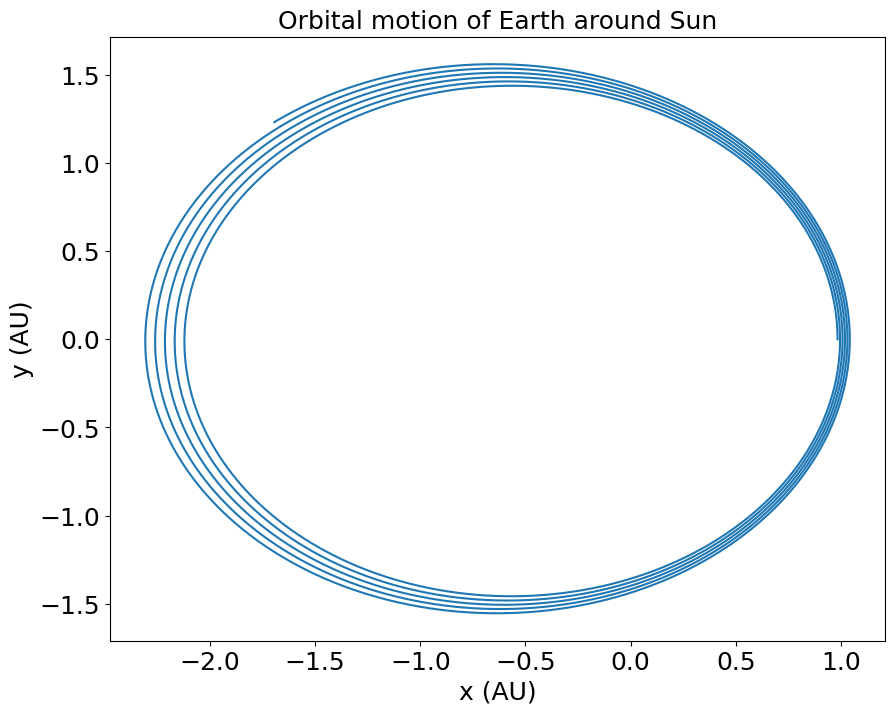

<Figure size 432x288 with 0 Axes>

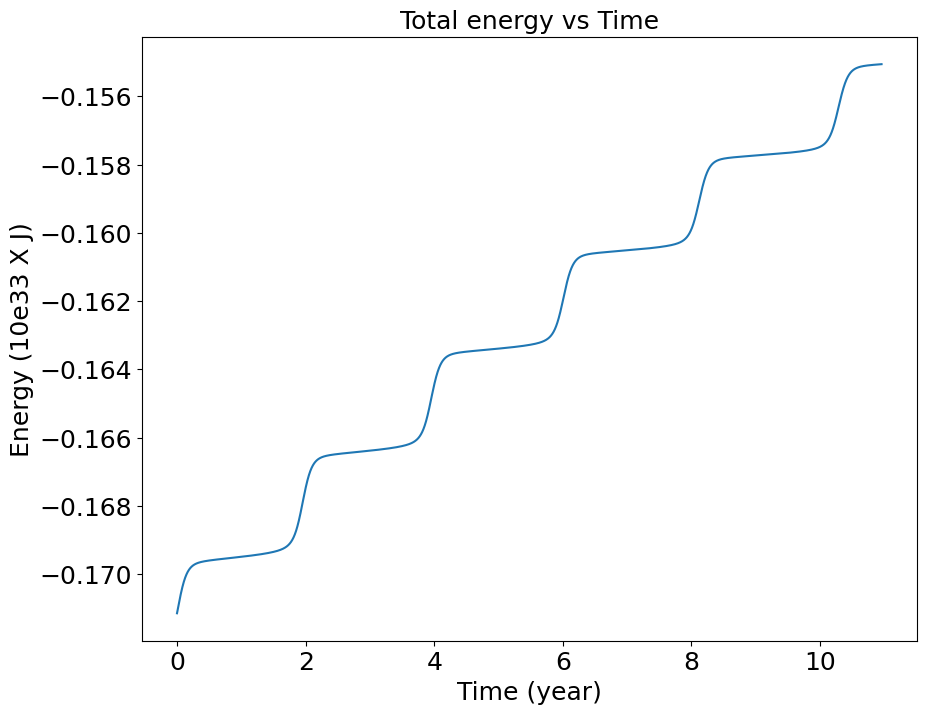

<Figure size 432x288 with 0 Axes>

In [7]:
G = 6.67e-11
#G = 39.441 #solar

#mass of the sun
Ms = 1.98e30
#Ms = 1 #solar

#earth mass
Me = 5.972e24

#initial position 
x0 = 147098291000
y0 = 0
#x0 = 1
#y0 = 0


r = np.array([x0,y0])

#initial velocity
vx0 = 0
vy0 = np.sqrt(G*Ms/np.power(np.linalg.norm(r),1.0) ) 

v = np.array([vx0,vy0+5000])

#velocity
dt = 0.08*24*60*60
tm = 4000*24*60*60


leap_kdk(G,Ms,Me,r,v,tm,dt)